In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## ▣ 문제

In [2]:
import pandas as pd

In [3]:
# data loed
iris = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
### 설명변수(x)와 반응변수(y)
x = iris.iloc[50:,3:5]
x.std = StandardScaler().fit_transform(x)
y = iris.iloc[50:,5]

In [5]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std,y,test_size=0.4)

In [6]:
### MLP
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,))  # hidden_layer_sizes=[10]
model = mlp.fit(x_train, y_train)

In [7]:
### 예측
y_pred = model.predict(x_test)

In [8]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,versicolor,virginica
Species,,
versicolor,20,1
virginica,0,19


## ▣ 문제

In [9]:
# data loed
mtcars = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
### 입력변수(x)와 출력변수(y)
x = mtcars[['mpg','am']]
x.std = StandardScaler().fit_transform(x)
y = mtcars.vs

In [11]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std,y,test_size=0.4)

In [12]:
### MLP
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,10))
model = mlp.fit(x_train, y_train)

In [13]:
### 예측
y_pred = model.predict(x_test)

In [14]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,0,1
vs,,
0,8,2
1,1,2


## 다중 클래스 분류
* 3개 이상의 클래스(범주)가 있는 경우

In [15]:
# data loed
wine = pd.read_csv('http://youngho.iwinv.net/data/wine_data.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
### 빈도표
pd.crosstab(wine.Class, 'Count')

col_0,Count
Class,
1,59
2,71
3,48


In [17]:
### 입력변수(x)와 출력변수(y)
x = wine.iloc[ : , 1:]
x.std = StandardScaler().fit_transform(x)
y = wine.Class

In [18]:
print(x.std.mean(axis=0), x.std.var(axis=0))

[-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  3.49283648e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std,y,test_size=0.4)

In [20]:
### [0,1] 조정
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
# x_train
x_train_min = x_train.min(axis=0)
x_train_max = (x_train - x_train_min).max(axis=0)
x_train = (x_train - x_train_min) / x_train_max
# x_test
x_test = (x_test - x_train_min) / x_train_max

In [21]:
### MLP
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,10))
model = mlp.fit(x_train, y_train)

In [22]:
### 예측
y_pred = model.predict(x_test)

In [23]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,1,2,3
Class,,,
1,25,0,0
2,0,26,1
3,0,1,19


In [24]:
### accuracy
model.score(x_test, y_test)

0.9722222222222222

06.10.수

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
import pandas as pd

In [27]:
# data loed
wine = pd.read_csv('http://youngho.iwinv.net/data/wine_data.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
wine.shape

(178, 14)

In [29]:
### 입력변수(x)와 출력변수(y)
x = wine.iloc[ : , 1:]
x.std = StandardScaler().fit_transform(x)
y = wine.Class

In [30]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std,y,test_size=0.4)

In [31]:
### [0,1] 조정
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
# x_train
x_train_min = x_train.min(axis=0)
x_train_max = (x_train - x_train_min).max(axis=0)
x_train = (x_train - x_train_min) / x_train_max
# x_test
x_test = (x_test - x_train_min) / x_train_max

## Solver, Alpha, Hidden layer sizes 조정

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Set the parameters by cross_validation
tuned_parameters = {'solver':['lbfgs'],
                   'alpha':[0.0001,0.001,0.01,0.1,1,10],
                   'hidden_layer_sizes':[(5,),(10,),(5,5),(10,10),(100,)]}

In [34]:
grid = GridSearchCV(MLPClassifier(),tuned_parameters)
%time grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

CPU times: user 6.3 s, sys: 7.95 ms, total: 6.31 s
Wall time: 6.28 s


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [35]:
grid.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}

In [36]:
### MLP
mlp = MLPClassifier(solver='lbfgs', alpha=grid.best_params_['alpha'],
                    hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'])
model = mlp.fit(x_train, y_train)

In [37]:
### 예측
y_pred = model.predict(x_test)

In [38]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,1,2,3
Class,,,
1,23,1,0
2,0,26,0
3,0,0,22


## Classifier comparison

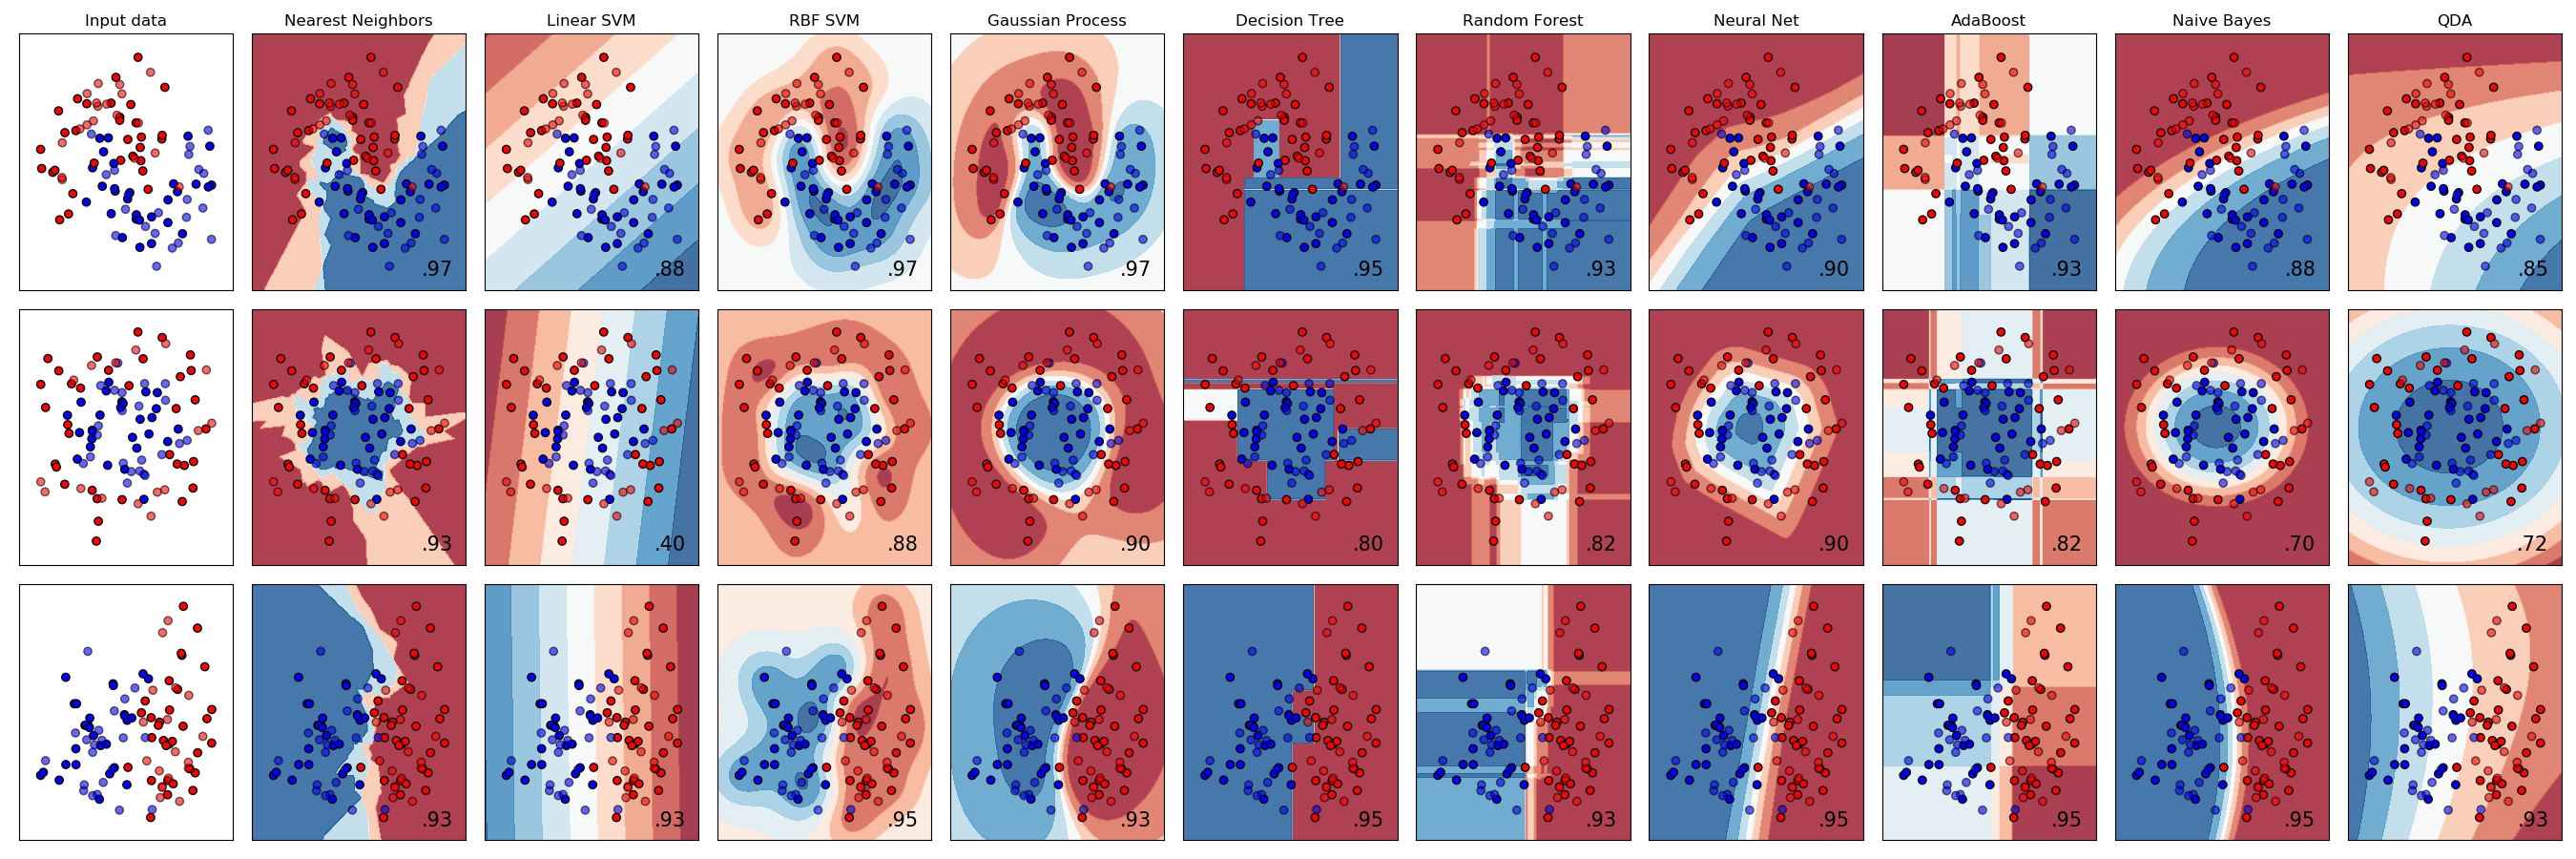

출처: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py